<a href="https://colab.research.google.com/github/Rahulhipparkar39667/AdEase-Time-Series-Forecasting/blob/main/AdEase_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining Problem Statement

**Problem Statement**

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

**Data Dictionary**

There are two csv files given

**1. train_1.csv:** In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

**2. Exog_Campaign_eng:** This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English.



# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Importing Dataset

In [ ]:
! gdown 1LCvFnnSMJcDha7l0AIBdfzN5vVRIJmie

Downloading...
From (original): https://drive.google.com/uc?id=1LCvFnnSMJcDha7l0AIBdfzN5vVRIJmie
From (redirected): https://drive.google.com/uc?id=1LCvFnnSMJcDha7l0AIBdfzN5vVRIJmie&confirm=t&uuid=9adaf7b3-b989-40a5-bbcf-ef449e05fc88
To: /content/train_1.csv
100% 278M/278M [00:07<00:00, 38.8MB/s]


In [ ]:
! gdown 1AnROWozyF1qwhGG-AXjcOZspHFgFaGH9

Downloading...
From: https://drive.google.com/uc?id=1AnROWozyF1qwhGG-AXjcOZspHFgFaGH9
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 1.42MB/s]


In [ ]:
# main dataset
df=pd.read_csv('/content/train_1.csv')
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# exog data
exog_df=pd.read_csv('/content/Exog_Campaign_eng')
exog_df

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


# Basic Analysis

## Shape of the data

**Main Dataset**

In [ ]:
df.shape

(145063, 551)

**Analysis:**

- Shape of dataframe is 145063 * 551
- Number of rows = 145063
- Number of columns = 551

**Exog Dataset**

In [ ]:
exog_df.shape

(550, 1)

**Analysis:**

- Shape of dataframe is 550 * 1
- Number of rows = 550
- Number of columns = 1

## First 5 Rows

**Train Dataset**

In [ ]:
df.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


**Analysis**

- The "Page" column provides details about the page name, the main domain, the type of device used to access the page, and the origin of the request (whether it was made by a spider or a browser agent).
- Date values are used as column indices, indicating that each column corresponds to a specific date.

**Exog Dataset**

In [ ]:
exog_df.head(5)

,Exog
0,0
1,0
2,0
3,0
4,0


**Analysis**
- The "Exog" column represents exogenous variable, which are external factor or event that might influence the forecasting of future events.

## Columns in a Dataframe

**Train Dataset**

In [ ]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

**Exog Dataset**

In [ ]:
exog_df.columns

Index(['Exog'], dtype='object')

## Concise Summary

**Train Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


**Exog Dataset**

In [ ]:
exog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


## Satatistical Summary

**Train Dataset**

In [ ]:
# Numeric Column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2015-07-01,124323.0,1195.856567,72753.518671,0.0,13.0,109.0,524.0,20381245.0
2015-07-02,124247.0,1204.003638,74215.145424,0.0,13.0,108.0,519.0,20752194.0
2015-07-03,124519.0,1133.675969,69610.224744,0.0,12.0,105.0,504.0,19573967.0
2015-07-04,124409.0,1170.437324,72573.513699,0.0,13.0,105.0,487.0,20439645.0
2015-07-05,124404.0,1217.769300,73796.116656,0.0,14.0,113.0,540.0,20772109.0
...,...,...,...,...,...,...,...,...
2016-12-27,141362.0,1678.301870,92324.820056,0.0,23.0,162.0,668.0,26916991.0
2016-12-28,141241.0,1633.965605,91858.307668,0.0,24.0,163.0,654.0,27025053.0
2016-12-29,141237.0,1684.307717,90142.656814,0.0,23.0,160.0,649.0,26073819.0
2016-12-30,141428.0,1467.943378,81554.814146,0.0,23.0,154.0,635.0,24363967.0


In [ ]:
# object column
df.describe(include='object').T

,count,unique,top,freq
Page,145063,145063,2NE1_zh.wikipedia.org_all-access_spider,1


**Exog Dataset**

In [ ]:
exog_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Exog,550.0,0.098182,0.297831,0.0,0.0,0.0,0.0,1.0


# Data Preprocessing

## Handling Missing Values

**Checking for Missing Values**

In [ ]:
df.head(1000).isnull().sum()

,0
Page,0
2015-07-01,65
2015-07-02,65
2015-07-03,67
2015-07-04,64
...,...
2016-12-27,9
2016-12-28,10
2016-12-29,9
2016-12-30,8


**Inference**:

There are missing values in a given data frame.

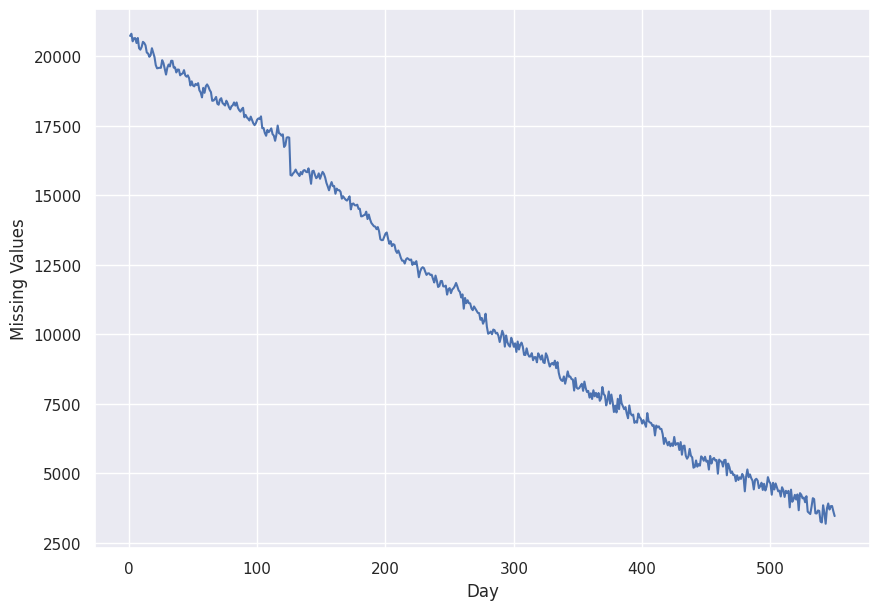

In [ ]:
days=[i for i in range(1,len(df.columns))]
plt.figure(figsize=(10,7))
plt.xlabel('Day')
plt.ylabel('Missing Values')
plt.plot(days,df.isnull().sum()[1:])
plt.show()

**Inference**:

- We can see that number of missing values decreases with time.
- Probable reason: Some websites have missing values at the beginning, likely because they were created later, meaning there is no traffic data available for those earlier dates

**Dropping rows where all values are NaN**

In [ ]:
df.dropna(how='all',inplace=True)

**Dropping rows that have NaN values more than 300 days, because the time series for that would not make sense**

In [ ]:
df.dropna(thresh=300,inplace=True)

**Fill all remaining NaN values with zero, assuming there was no traffic recorded on those dates**

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.head(1000).isnull().sum()

,0
Page,0
2015-07-01,0
2015-07-02,0
2015-07-03,0
2015-07-04,0
...,...
2016-12-27,0
2016-12-28,0
2016-12-29,0
2016-12-30,0


**Inference:**

After the treatment ,there are no missing values in the data.

## Feature Engineering

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133612,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
133613,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
133614,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
133615,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0


In [ ]:
df['Page'].head(10)

,Page
0,2NE1_zh.wikipedia.org_all-access_spider
1,2PM_zh.wikipedia.org_all-access_spider
2,3C_zh.wikipedia.org_all-access_spider
3,4minute_zh.wikipedia.org_all-access_spider
4,5566_zh.wikipedia.org_all-access_spider
5,A'N'D_zh.wikipedia.org_all-access_spider
6,AKB48_zh.wikipedia.org_all-access_spider
7,ASCII_zh.wikipedia.org_all-access_spider
8,ASTRO_zh.wikipedia.org_all-access_spider
9,Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...


**Extracting page title, language ,access type and access origin**

In [ ]:
import re
def split_page(page):
  words=re.split('_|\.',page)
  return (words[-6],words[-5],words[-2],words[-1])
split_page('2PM_zh.wikipedia.org_all-access_spider')

('2PM', 'zh', 'all-access', 'spider')

In [ ]:
List= list(df['Page'].apply(lambda x:split_page(str(x))))
temp=pd.DataFrame(List, columns=['Title','Language','Access_type','Access_origin'])
df=pd.concat([df,temp],axis=1)
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,5566,zh,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133612,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,4.0,1.0,2.0,2.0,Comics),es,all-access,spider
133613,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,3.0,10.0,11.0,3.0,Europea,es,all-access,spider
133614,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,8.0,22.0,13.0,18.0,14.0,Europea,es,all-access,spider
133615,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,7.0,5.0,43.0,12.0,25.0,amar,es,all-access,spider


In [ ]:
df['Language'].value_counts()

,count
Language,
en,22486
ja,19295
de,17362
fr,16948
zh,15211
ru,14270
es,13551
commons,8266
www,6228


**Inference**:

We need to map the language codes to their respective languages, and if a code does not correspond to any language, we will map it to 'unknown'.

**Mapping language codes to their respective langauge**

In [ ]:
lang_dict={'de':'German',
           'en':'English',
           'es':'Spanish',
           'fr':'French',
           'ja':'Japanese',
           'ru': 'Russian',
           'zh': 'Chinese',
           'commons':'Unknown',
           'www':'Unknown'
}
df['Language']=df['Language'].map(lang_dict)

In [ ]:
df['Language'].value_counts()

,count
Language,
English,22486
Japanese,19295
German,17362
French,16948
Chinese,15211
Unknown,14494
Russian,14270
Spanish,13551


In [ ]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,Chinese,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,Chinese,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,Chinese,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,Chinese,all-access,spider
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,5566,Chinese,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133612,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,4.0,1.0,2.0,2.0,Comics),Spanish,all-access,spider
133613,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,3.0,10.0,11.0,3.0,Europea,Spanish,all-access,spider
133614,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,8.0,22.0,13.0,18.0,14.0,Europea,Spanish,all-access,spider
133615,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,7.0,5.0,43.0,12.0,25.0,amar,Spanish,all-access,spider


# EDA

## Distribution of Language

In [ ]:
colors = ["#2c699a", "#048ba8",'#20A39E',"#0db39e","#83e377","#b9e769","#efea5a","#f1c453","#F7B267"]
values=df['Language'].value_counts()
labels=df['Language'].value_counts().index

# create pie chart
pie_chart=go.Figure(go.Pie(labels=labels,values=values))
pie_chart.update_traces(hoverinfo='label+value',textinfo='percent',textfont_size=20,
                        marker=dict(colors=colors,line=dict(color='#000000',width=2)))

# create bar chart
bar_chart=go.Figure(go.Bar(x=labels,y=values,marker_color=colors))

# Create subplots
fig=sp.make_subplots(rows=1,cols=2,column_widths=[0.5,0.5],specs=[[{'type':'bar'},{'type':'pie'}]],subplot_titles=("Bar Chart","Pie Chart"))

# Add charts to the subplots

fig.add_trace(bar_chart.data[0],row=1,col=1)
fig.add_trace(pie_chart.data[0],row=1,col=2)

#Update Layout
fig.update_layout(showlegend=False,title_text='Distribution of Language',
                  xaxis=dict(title='Language',titlefont_size=16,tickfont_size=14,),
                  yaxis=dict(title='Number of pages',titlefont_size=16,tickfont_size=14,))

fig.show(render='static')

**Insights**

- 16.8% of the pages are in English.
- 14.4% of the pages are in Japanese.
- 13% of the pages are in German.
- 12.7% of the pages are in French.
- 11.4% of the pages are in Chinese.
- 10.8% of the pages are in an unknown language.
- 10.7% of the pages are in Russian.
- 10.1% of the pages are in Spanish.

## Distribution of Access Type

In [ ]:
colors = ['#D4D2A5','#FCDEBE','#ddbea9','#ffc8dd']
values=df['Access_type'].value_counts()
labels=df['Access_type'].value_counts().index

# create pie chart
pie_chart=go.Figure(go.Pie(labels=labels,values=values))
pie_chart.update_traces(hoverinfo='label+value',textinfo='percent',textfont_size=20,
                        marker=dict(colors=colors,line=dict(color='#000000',width=2)))

# create bar chart
bar_chart=go.Figure(go.Bar(x=labels,y=values,marker_color=colors))

# Create subplots
fig=sp.make_subplots(rows=1,cols=2,column_widths=[0.5,0.5],specs=[[{'type':'bar'},{'type':'pie'}]],subplot_titles=("Bar Chart","Pie Chart"))

# Add charts to the subplots

fig.add_trace(bar_chart.data[0],row=1,col=1)
fig.add_trace(pie_chart.data[0],row=1,col=2)

#Update Layout
fig.update_layout(showlegend=False,title_text='Distribution of Access Type',
                  xaxis=dict(title='Access Type',titlefont_size=16,tickfont_size=14,),
                  yaxis=dict(title='Number of pages',titlefont_size=16,tickfont_size=14,))

fig.show()

**Insights**:

- The majority of pages (51.4%) fall under the 'all-access' access type.
- A significant portion (24.95%) of the pages are accessed via 'mobile-web.'
- 'Desktop' access accounts for 23.6% of the total page accesses.

## Distribution of access origin

In [ ]:
colors=['#BC9EC1', '#E3BAC6']
values=df['Access_origin'].value_counts()
labels=df['Access_origin'].value_counts().index

# create pie chart
pie_chart=go.Figure(go.Pie(labels=labels,values=values))
pie_chart.update_traces(hoverinfo='label+value',textinfo='percent',textfont_size=20,
                        marker=dict(colors=colors,line=dict(color='#000000',width=2)))

# create bar chart
bar_chart=go.Figure(go.Bar(x=labels,y=values,marker_color=colors))

# Create subplots
fig=sp.make_subplots(rows=1,cols=2,column_widths=[0.5,0.5],specs=[[{'type':'bar'},{'type':'pie'}]],subplot_titles=("Bar Chart","Pie Chart"))

# Add charts to the subplots

fig.add_trace(bar_chart.data[0],row=1,col=1)
fig.add_trace(pie_chart.data[0],row=1,col=2)

#Update Layout
fig.update_layout(showlegend=False,title_text='Distribution of Access origin',
                  xaxis=dict(title='Access origin',titlefont_size=16,tickfont_size=14,),
                  yaxis=dict(title='Number of pages',titlefont_size=16,tickfont_size=14,))

fig.show()

**Insights**:

- The majority of pages (75.8%) originate from 'all-agents' access.
- 'Spider' access origin accounts for 24.2% of the total pages.

## Plotting Time-Series by Language

In [ ]:
df.groupby('Language').count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
Chinese,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211
English,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
French,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
German,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362
Japanese,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295
Russian,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
Spanish,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551
Unknown,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494,...,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494


In [ ]:
# we can drop
df_language=df.drop(['Page','Title','Access_type','Access_origin'],axis=1)
df_language


,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,Chinese
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,Chinese
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,Chinese
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,Chinese
4,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0,Spanish
133613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0,Spanish
133614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0,Spanish
133615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0,Spanish


In [ ]:
df_language=df_language.groupby('Language').mean().transpose()
df_language

Language,Chinese,English,French,German,Japanese,Russian,Spanish,Unknown
2015-07-01,272.498521,3767.328604,499.092872,763.765926,614.637160,663.199229,1127.485204,102.733545
2015-07-02,272.906778,3755.158765,502.297852,753.362861,705.813216,674.677015,1077.485425,107.663447
2015-07-03,271.097167,3565.225696,483.007553,723.074415,637.451671,625.329783,990.895949,101.769629
2015-07-04,273.712379,3711.782932,516.275785,663.537323,800.897435,588.171829,930.303151,86.853871
2015-07-05,291.977713,3833.433025,506.871666,771.358657,768.352319,626.385354,1011.759575,96.254105
...,...,...,...,...,...,...,...,...
2016-12-27,363.066991,6314.335275,840.590217,1119.596936,808.541436,998.374071,1070.923400,155.270181
2016-12-28,369.049701,6108.874144,783.585379,1062.284069,807.430163,945.054730,1108.996753,178.561267
2016-12-29,340.526330,6518.058525,763.209169,1033.939062,883.752786,909.352207,1058.660320,150.873534
2016-12-30,342.745316,5401.792360,710.502773,981.786430,979.278777,815.475123,807.551177,156.049193


In [ ]:
df_language.reset_index(inplace=True)
df_language.set_index('index',inplace=True)
df_language

Language,Chinese,English,French,German,Japanese,Russian,Spanish,Unknown
index,,,,,,,,
2015-07-01,272.498521,3767.328604,499.092872,763.765926,614.637160,663.199229,1127.485204,102.733545
2015-07-02,272.906778,3755.158765,502.297852,753.362861,705.813216,674.677015,1077.485425,107.663447
2015-07-03,271.097167,3565.225696,483.007553,723.074415,637.451671,625.329783,990.895949,101.769629
2015-07-04,273.712379,3711.782932,516.275785,663.537323,800.897435,588.171829,930.303151,86.853871
2015-07-05,291.977713,3833.433025,506.871666,771.358657,768.352319,626.385354,1011.759575,96.254105
...,...,...,...,...,...,...,...,...
2016-12-27,363.066991,6314.335275,840.590217,1119.596936,808.541436,998.374071,1070.923400,155.270181
2016-12-28,369.049701,6108.874144,783.585379,1062.284069,807.430163,945.054730,1108.996753,178.561267
2016-12-29,340.526330,6518.058525,763.209169,1033.939062,883.752786,909.352207,1058.660320,150.873534


In [ ]:
df_language.index.name='Date'
df_language

Language,Chinese,English,French,German,Japanese,Russian,Spanish,Unknown
Date,,,,,,,,
2015-07-01,272.498521,3767.328604,499.092872,763.765926,614.637160,663.199229,1127.485204,102.733545
2015-07-02,272.906778,3755.158765,502.297852,753.362861,705.813216,674.677015,1077.485425,107.663447
2015-07-03,271.097167,3565.225696,483.007553,723.074415,637.451671,625.329783,990.895949,101.769629
2015-07-04,273.712379,3711.782932,516.275785,663.537323,800.897435,588.171829,930.303151,86.853871
2015-07-05,291.977713,3833.433025,506.871666,771.358657,768.352319,626.385354,1011.759575,96.254105
...,...,...,...,...,...,...,...,...
2016-12-27,363.066991,6314.335275,840.590217,1119.596936,808.541436,998.374071,1070.923400,155.270181
2016-12-28,369.049701,6108.874144,783.585379,1062.284069,807.430163,945.054730,1108.996753,178.561267
2016-12-29,340.526330,6518.058525,763.209169,1033.939062,883.752786,909.352207,1058.660320,150.873534


In [ ]:
df_language.index

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', name='Date', length=550)

In [ ]:
fig=px.line(df_language,x=df_language.index,y=df_language.columns)
fig.update_layout(title='Time Series by language',
                   xaxis_title='Date',
                   yaxis_title='Views per page')
fig.show()

**Insights**:

- Websites in English have the highest number of views compared to other languages.
- Different languages experience traffic spikes at various times.

# Data Preparation

## Checking for stationarity

### Dickey-Fuller Test

In [ ]:
data=df_language.copy()
data.index=pd.to_datetime(data.index)
data

Language,Chinese,English,French,German,Japanese,Russian,Spanish,Unknown
Date,,,,,,,,
2015-07-01,272.498521,3767.328604,499.092872,763.765926,614.637160,663.199229,1127.485204,102.733545
2015-07-02,272.906778,3755.158765,502.297852,753.362861,705.813216,674.677015,1077.485425,107.663447
2015-07-03,271.097167,3565.225696,483.007553,723.074415,637.451671,625.329783,990.895949,101.769629
2015-07-04,273.712379,3711.782932,516.275785,663.537323,800.897435,588.171829,930.303151,86.853871
2015-07-05,291.977713,3833.433025,506.871666,771.358657,768.352319,626.385354,1011.759575,96.254105
...,...,...,...,...,...,...,...,...
2016-12-27,363.066991,6314.335275,840.590217,1119.596936,808.541436,998.374071,1070.923400,155.270181
2016-12-28,369.049701,6108.874144,783.585379,1062.284069,807.430163,945.054730,1108.996753,178.561267
2016-12-29,340.526330,6518.058525,763.209169,1033.939062,883.752786,909.352207,1058.660320,150.873534


In [ ]:
fig=px.line(data,x=data.index,y='English')
fig.update_layout(title='Time Series ',
                   xaxis_title='Date',
                   yaxis_title='Views per page')
fig.show()

**Dickey - Fuller Test**

Formulating Null and Alternative Hypotheses:

***H0: Data is not stationary***

***Ha: Data is stationary***


In [ ]:
import statsmodels.api as sm
def adf_test(data):
  result=sm.tsa.stattools.adfuller(data)
  adf_stat=result[0]
  p_value=result[1]
  print("adf statistic :",adf_stat)
  print("p value :",p_value)
  if p_value < 0.05:
    print(f'Reject H0 : Data is stationary ')
  else:
    print(f'Failed to reject H0: Data is not stationary')


In [ ]:
adf_test(data['English'])

adf statistic : -2.373562974569941
p value : 0.14933749437355304
Failed to reject H0: Data is not stationary


**Inference**:

The data exhibits non-stationarity, indicating the presence of trends, seasonality, or both. It is necessary to decompose the time series to analyze these components.

### Time series decomposition

In [ ]:
ts=data['English']
ts.index=pd.to_datetime(ts.index)

**As this is web traffic data, the time series will likely be multiplicative: Yt = T * S * E, where T represents the trend, S represents seasonality, and E is the error term.**

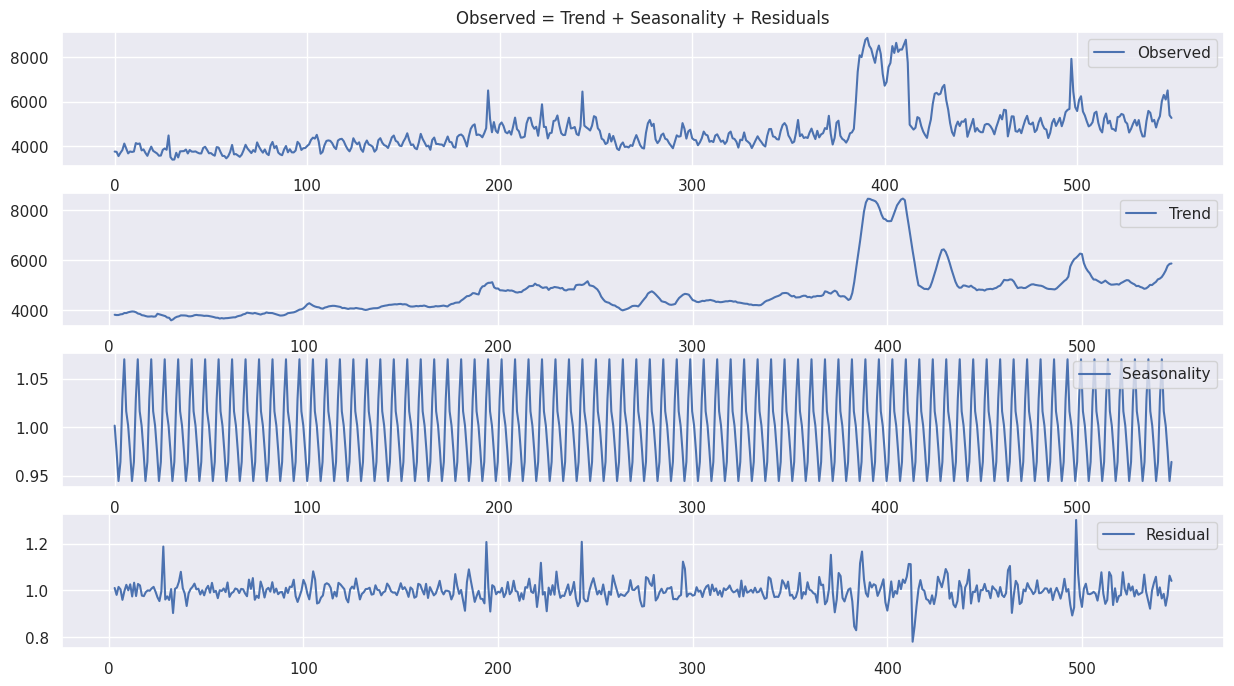

In [ ]:
decomposition= sm.tsa.seasonal_decompose(ts.values,model='multiplicative',period=7)
trend=decomposition.trend
seasonality=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(15,8))
sns.set_style('darkgrid')

# Observed
plt.subplot(411)
plt.title('Observed = Trend + Seasonality + Residuals')
plt.plot(ts.values,label='Observed')
plt.legend(loc='best')

# Trend
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

# Seasonality
plt.subplot(413)
plt.plot(seasonality,label='Seasonality')
plt.legend(loc='best')

# Residuals
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.show()

**Inference**:

We decomposed the time series and identified that it contains both trend and seasonality. Therefore, it is necessary to remove these components in order to convert the data into a stationary series.

### Remove trend and seasonality from Time-Series

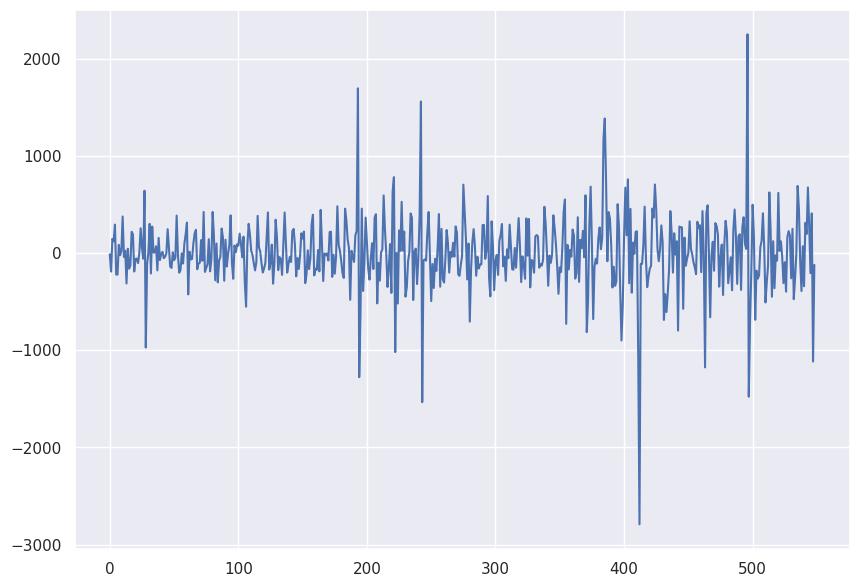

In [ ]:
ts_diff=ts-ts.shift(1)
ts_diff=ts_diff.dropna()
plt.figure(figsize=(10,7))
plt.plot(ts_diff.values)
plt.show()

**Inference**

The time series has been transformed into stationary data, as observed by the data now being centered around a mean of 0.

## Train-Test split

In [ ]:
train=ts[:520]
test=ts[520:]

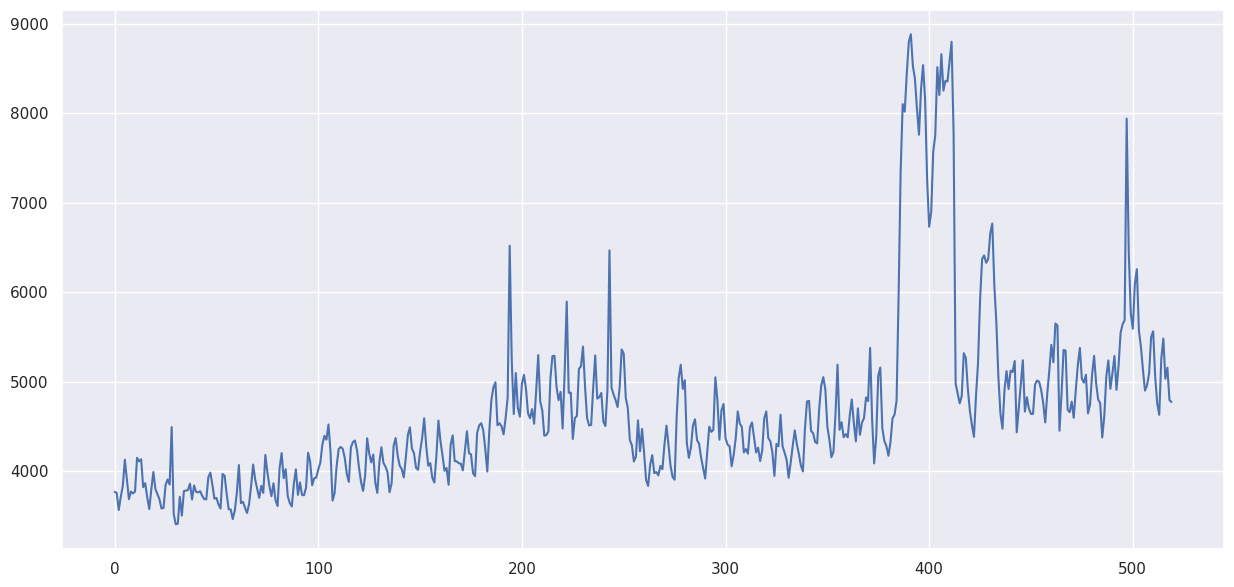

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train.values)
plt.show()

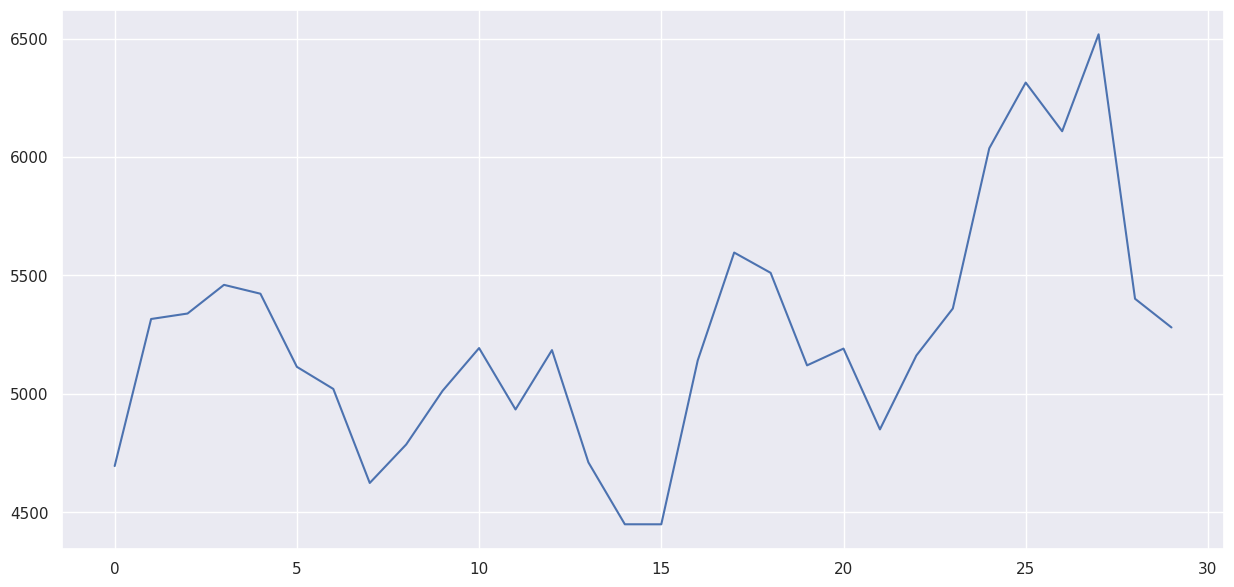

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(test.values)
plt.show()

## Exogenous Variable

In [ ]:
exog_df

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


In [ ]:
exog=exog_df['Exog'].to_numpy()
exog

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Forecasting

## SARIMAX Model

### Performance Function

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
    )

def performance(actual,predicted):
  print('RMSE :', np.round(mse(actual,predicted)**0.5,3))
  print('MAE :', np.round(mae(actual,predicted),3))
  print('MAPE :',np.round(mape(actual,predicted),3))


### Hyperparameter Tuning

**How do we choose p,d,q**

a thumb rule that for choosing the p,q values are when the lag goes below the significant level.

**To choose the value of P we will use PACF (partial autocorrelation funtion)**

<Figure size 1000x800 with 0 Axes>

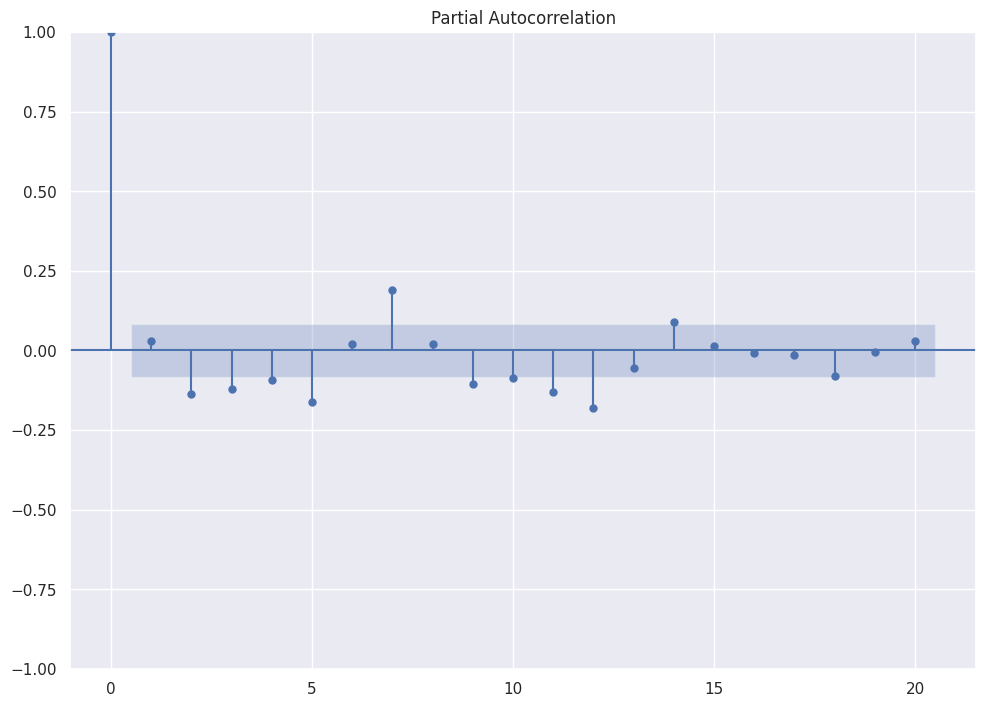

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(10,8))
pacf=plot_pacf(ts_diff, lags=20)
plt.show()

**Inference**

We use the PACF (Partial Autocorrelation Function) plot to determine the appropriate value for the autoregressive (AR) term
p in an ARIMA or AR model. In this plot, we observe that significant spikes occur up to lag 5, indicating potential autocorrelation up to that point. However, to keep the model simpler, we can start with a smaller value for
p, such as 3 or 4, and evaluate its performance before considering higher values.


**To choose the value of q we will use the ACF plot**

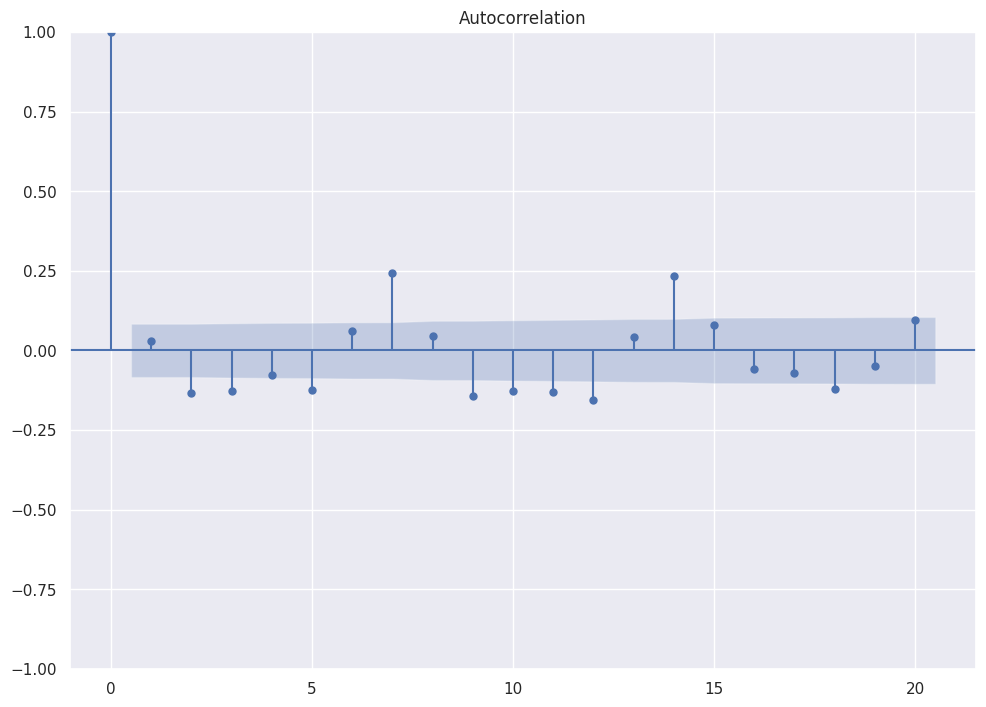

In [ ]:
acf=plot_acf(ts_diff,lags=20)

**Inference**:

We use the ACF plot to determine the value for q. Here, we can observe that the spike at lag 4 is below the significance level, so we will use q=3.

**As for d, we can observe that after applying first-order differencing, the series becomes stationary. Therefore, we choose
d=1**.

### Model training

In [ ]:
model=sm.tsa.statespace.SARIMAX(train,order=(4,1,3),seasonal_order=(1,1,1,7),exog=exog[:520]) # 7 means seasonality , got from pacf plot
result=model.fit()


### Model Evaluation

RMSE : 291.105
MAE : 235.208
MAPE : 0.044


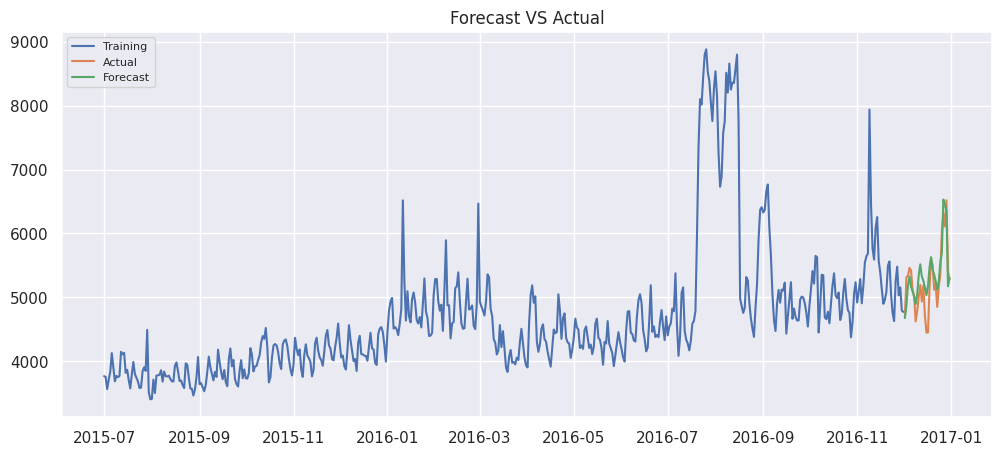

In [ ]:
fc=result.forecast(steps=30,dynamic=True,exog=pd.DataFrame(exog[520:]))
performance(fc,test.values)
fc_series=pd.Series(fc)
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='Training')
plt.plot(test,label='Actual')
plt.plot(fc_series, label='Forecast')
plt.title('Forecast VS Actual')
plt.legend(loc='upper left',fontsize=8)
plt.show()

**Inference**:


The model has a MAPE (Mean Absolute Percentage Error) of 0.04, which is less than 5%, indicating high accuracy. This model effectively forecasts web traffic for the English language page.

## Facebook Prophet

### Data Preparation

In [ ]:
!pip install cmdstanpy==1.0.4 prophet

In [ ]:
ts_df=ts.to_frame()
ts_df.head()

,English
Date,
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025


In [ ]:
ts_df.reset_index(inplace=True)
ts_df

,Date,English
0,2015-07-01,3767.328604
1,2015-07-02,3755.158765
2,2015-07-03,3565.225696
3,2015-07-04,3711.782932
4,2015-07-05,3833.433025
...,...,...
545,2016-12-27,6314.335275
546,2016-12-28,6108.874144
547,2016-12-29,6518.058525
548,2016-12-30,5401.792360


In [ ]:
ts_df['exog']=exog_df['Exog']
ts_df

,Date,English,exog
0,2015-07-01,3767.328604,0
1,2015-07-02,3755.158765,0
2,2015-07-03,3565.225696,0
3,2015-07-04,3711.782932,0
4,2015-07-05,3833.433025,0
...,...,...,...
545,2016-12-27,6314.335275,1
546,2016-12-28,6108.874144,1
547,2016-12-29,6518.058525,1
548,2016-12-30,5401.792360,0


In [ ]:
df2=ts_df[['Date','English','exog']].copy()
df2.columns = ['ds', 'y', 'exog']
df2.head()

,ds,y,exog
0,2015-07-01,3767.328604,0
1,2015-07-02,3755.158765,0
2,2015-07-03,3565.225696,0
3,2015-07-04,3711.782932,0
4,2015-07-05,3833.433025,0


In [ ]:
df2[:-20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      530 non-null    datetime64[ns]
 1   y       530 non-null    float64       
 2   exog    530 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 12.5 KB


### Prophet without exog

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmuwq84z_/cy0sinxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmuwq84z_/bv_73fi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53045', 'data', 'file=/tmp/tmpmuwq84z_/cy0sinxn.json', 'init=/tmp/tmpmuwq84z_/bv_73fi1.json', 'output', 'file=/tmp/tmpmuwq84z_/prophet_model4hb0etf9/prophet_model-20241008103323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:33:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:33:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


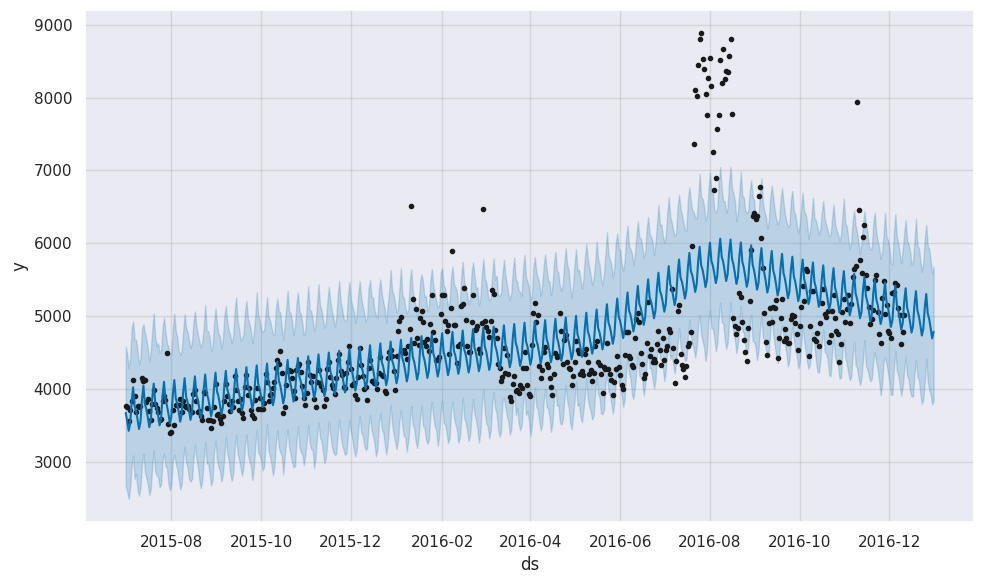

In [ ]:
from prophet import Prophet
m=Prophet(weekly_seasonality=True)
m.fit(df2[['ds','y']][:-20])
future=m.make_future_dataframe(periods=20,freq='D')
forecast=m.predict(future)
fig=m.plot(forecast)

### Prophet With Exog

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmuwq84z_/yqgh4nau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmuwq84z_/ypk9a88u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76264', 'data', 'file=/tmp/tmpmuwq84z_/yqgh4nau.json', 'init=/tmp/tmpmuwq84z_/ypk9a88u.json', 'output', 'file=/tmp/tmpmuwq84z_/prophet_model2frmpi9n/prophet_model-20241008111547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


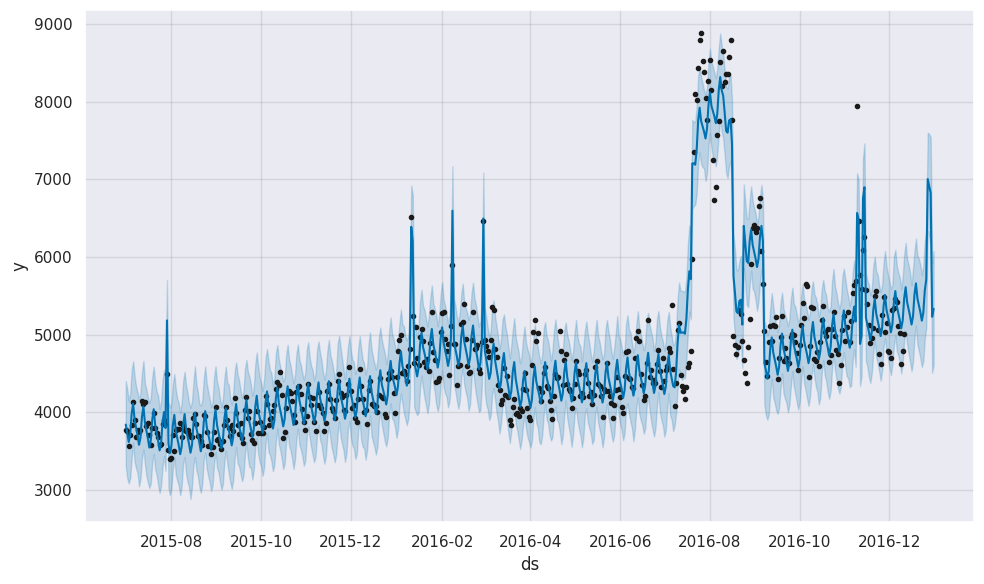

In [ ]:
model2=Prophet(interval_width=0.9,weekly_seasonality=True,changepoint_prior_scale=1)
model2.add_regressor('exog')
model2.fit(df2[:-20])
forecast2=model2.predict(df2)
fig=model2.plot(forecast2)

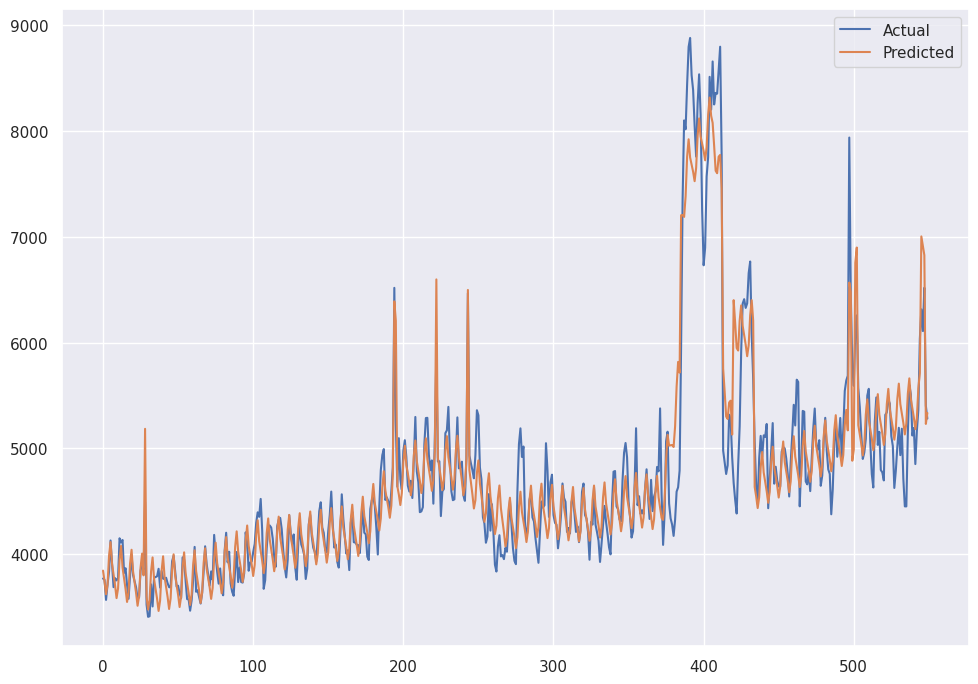

In [ ]:
y_true=df2['y']
y_pred=forecast2['yhat']
plt.plot(y_true,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.show()


In [ ]:
mape = np.mean(np.abs(forecast2['yhat'][-20:] - df2['y'][-20:].values)/np.abs(df2['y'][-20:].values))
print("mape:",mape)

mape: 0.06622248919924485


**Inference**:

The MAPE of the Facebook Prophet model is 0.06, which is higher than the 0.04 of the SARIMAX model, indicating that SARIMAX offers more accurate forecasts for this dataset.

# Insights


- 16.8% of the pages are in English.
- 14.4% of the pages are in Japanese.
- 13% of the pages are in German.
- 12.7% of the pages are in French.
- 11.4% of the pages are in Chinese.
- 10.8% of the pages are in an unknown language.
- 10.7% of the pages are in Russian.
- 10.1% of the pages are in Spanish.
- The majority of pages (51.4%) fall under the 'all-access' access type.
- A significant portion (24.95%) of the pages are accessed via 'mobile-web.'
- 'Desktop' access accounts for 23.6% of the total page accesses.
- The majority of pages (75.8%) originate from 'all-agents' access.
- 'Spider' access origin accounts for 24.2% of the total pages.
- Websites in English have the highest number of views compared to other languages.
- Different languages experience traffic spikes at various times.

# Recommendations


1. **Prioritize English Content**: Since 16.8% of the pages are in English and attract the highest views, focus on enhancing and optimizing English-language content to capture more traffic.

2. **Tailor Language-Specific Strategies**: With notable traffic from Japanese, German, French, and Chinese pages, create tailored SEO and content strategies for these languages to drive traffic and engagement, accounting for regional preferences.

3. **Optimize for Mobile-Web**: Since 24.95% of the pages are accessed via mobile-web, ensure that your website is mobile-friendly and provides an excellent user experience on smartphones and tablets.

4. **Leverage 'All-Access' Traffic**: Given that 51.4% of pages fall under the 'all-access' type, consider implementing cross-device tracking and analytics to optimize user experience across all platforms.

5. **Monitor Spider and Bot Traffic**: Since 24.2% of the pages originate from 'spider' access, review and manage bot traffic to ensure it doesn’t skew analytics or overburden servers.